# Version-2
### Change1 - Batch Size

  For the batch_size comparison, I reset the runtime everytime I was trying new batch. This helped in making a fair comparison and did not increase the epoch number. 
  - Batch Size: 32  
  Max. validation accuracy: 99.27% (4th epoch)
  - Batch Size: 64  
  Max. validation accuracy: 99.36% (20th epoch)
  - Batch Size: 128  
    Max. validation accuracy: 99.32% (20th epoch)
    
  After the above experiment, I decided to go on with batch_size of 64

### Change2 - Number of parameters

  **Version:2.1**
  - Batch Size: 64
  - Total number of parameters: 14,402
  - Max validation accuracy: 99.19%  (24th epoch)
  
  
  **Version:2.2**
  - Batch Size: 64
  - Total number of parameters: 7,784
  - Max validation accuracy: 98.90%  (20th epoch)

### Change3 - Adding Batch Normalization

  **Version:2.1**
  - Total number of parameters: 14,874
  - Max validation accuracy: 99.27%  (23rd epoch)

  
  **Version:2.2**
  - Total number of parameters: 8,120
  - Max validation accuracy: 99.07%  (19th epoch)
  
After training the above 2 models, I decided to go on with version-2.2.    
Its clear during the training that the model is overfitting. In next version, I will do changes to avoid overfitting of the model.

---


### Install Dependencies 

- To train the following network, we use a framework named Keras.
- Keras provides functions for Convolution layers, Activation layers, MaxPooling layer, etc. so we don't need write code for designing such layers. Instead we can focus on creating better network architecture
- Following lines of code installs Keras on the system

In [0]:
# https://keras.io/
!pip install -q keras
import keras

Using TensorFlow backend.


### Import Libraries and Modules

In [0]:
# Import Numpy for matrices and multi-dimensional array's processing
import numpy as np

# Import Sequential to write model layer-by-layer in sequence 
from keras.models import Sequential

# Import Flatten layer to flatten feature-map, Dropout to avoid overfitting
from keras.layers import Flatten, Dropout, Activation, BatchNormalization

# Import Convolution layer to perform convolution on the channels, MaxPooling to reduce dimensions of channel
from keras.layers import Convolution2D, MaxPooling2D

# Import np_utils for one-hot-encoding
from keras.utils import np_utils

# Import hand written dataset of numbers from 0-9
from keras.datasets import mnist

### Load the Data
The data is loaded in following variables:

- X_train: Samples used during training the network
- y_train: Corresponding labels for training data
- X_test: Samples used for validation after training the network
- y_test: Corresponding labels for the validation of network's performance

In [0]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


### Dataset Information and Display Data Sample
- We have 60000 images in training dataset
- We have 10000 images in the testing dataset
- Each image's dimension are 28x28x1

(60000, 28, 28)
(10000, 28, 28)


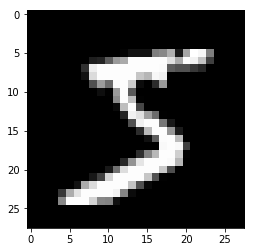

In [0]:
# Dimensions of the training dataset images
print (X_train.shape)

# Dimensions of the testing dataset images
print (X_test.shape)

# Import python module for plotting the image
from matplotlib import pyplot as plt

# Below line is written to display an image in this notebook
%matplotlib inline

# Plotting first image in the training dataset
# cmap='gray' displays the data sample in appropriate color space
plt.imshow(X_train[0], cmap='gray')

### Reshape the dataset
- Keras requires the input data in a form of 4D tensor
- The first value represents the total number of images in a training/testing dataset
- Second and third values are dimensions of an image
- Fourth value is the number of channels (1 for grayscale and 3 for RGB)  

Thus, the X_train will have a shape of (60000, 28, 28, 1)  
and the X_test will have a shape of (1000, 28, 28, 1)

In [0]:
X_train = X_train.reshape(X_train.shape[0], 28, 28,1)
X_test = X_test.reshape(X_test.shape[0], 28, 28,1)

### Normalizing the Data
- When a Kernel is convolved over an input image, the maximum pixel value in the feature-map depends upon the maximum pixel value in the kernel
- Different kernels will have different maximum values and so their corresponding feature-maps will have different maximum values
- The feature-map with greater maximum pixel value will be louder while training the network
- To avoid biased activations of such kernels, we perform Normalization
- For normalization, we first convert the data into float so that we can get all the decimal values
- By dividing all the pixels by 255, all the pixel values will be restricted between 0.0 to 1.0. This is how we normalize the data.

In [0]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

### Print Labels

In [0]:
y_train[:10]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4], dtype=uint8)

### One-Hot Encoding
- It is way of representing labels
- Instead of using one-single scalar for labels, we use a vector to represent the labels.
- The position of the ground-truth is marked as 1 while other positions are marked as 0
- The network cannot print out the prediction as 0,1,2,....9
- Instead it can activate the neuron associated with these numbers. So, the last layer before activation layer has number of neurons equal to number of classes (in this case 10)
- The neuron associated with the number is set as 1 while other neurons are set as 0. Following is the pattern in which encoding is done:  
  - Number 0 is encoded as 1000000000  
  - Number 1 is encoded as 0100000000  
  - Number 2 is encoded as 0010000000  
   .  
   .  
   .  
   .  
  - Number 9 is encoded as 0000000001

In [0]:
# Convert 1-dimensional class arrays to 10-dimensional class matrices
Y_train = np_utils.to_categorical(y_train, 10)
Y_test = np_utils.to_categorical(y_test, 10)

### Print Labels after one-hot encoding

In [0]:
Y_train[:10]

array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]], dtype=float32)

### Model Architecture

- Model is defined sequential
- The model has convolution, maxpooling, flatten and softmax layers

- **Convolution Layer:**
  - It is a process of extracting features from a channel using a kernel (feature extractor)
![](https://github.com/Shilpaj1994/Phase1_assignments/blob/master/Assignment%201/5-3ConvolutionSmall.gif?raw=true)

- **MaxPooling Layer:**
  - It reduces the dimension of an channel. If we use MaxPooling of 2x2, dimension of an channel will become half of input channel
  - It only passes the louder pixel value in the next layer
![](https://github.com/Shilpaj1994/Phase1_assignments/blob/master/Assignment%203/Files/maxpool.gif?raw=true)

- **Softmax Layer:**
  - It is like probability
  - It gives score of a class between 0 and 1
![](https://github.com/Shilpaj1994/Phase1_assignments/blob/master/Assignment%201/softmax.png?raw=true)

- **Flatten Layer:**
  - It flattens the input dimension
  - Multiple 2D channels are converted into a vector 

## Version - 2.1 with 14,402 parameters

In [0]:
# For reproducable results
np.random.seed(7)

# Define Sequential Model Type
model = Sequential()

# Convolution Block
model.add(Convolution2D(10, 3, 3, activation='relu', input_shape=(28,28,1), name='conv_1'))   # Layer 1: Input:28x28x01  |  Kernels:(3x3x01)x10  |  Output:26x26x10  |  Receptive Field:3x3 
model.add(Convolution2D(16, 3, 3, activation='relu', name='conv_2'))                          # Layer 2: Input:26x26x10  |  Kernels:(3x3x10)x16  |  Output:24x24x16  |  Receptive Field:5x5  
model.add(Convolution2D(18, 3, 3, activation='relu', name='conv_3'))                          # Layer 3: Input:24x24x16  |  Kernels:(3x3x16)x18  |  Output:22x22x18  |  Receptive Field:7x7

# Transition Block
model.add(Convolution2D(10, 1, 1, activation='relu', name='conv_4_1x1'))                      # Layer 4: Input:22x22x18  |  Kernels:(1x1x18)x10  |  Output:22x22x10  |  Receptive Field:7x7 
model.add(MaxPooling2D(2, name='MP'))                                                         # Layer 5: Input:22x22x10  |    MaxPooling:(2x2)   |  Output:11x11x10  |  Receptive Field:14x14 

# Convolution Block
model.add(Convolution2D(16, 3, 3, activation='relu', name='conv_5'))                          # Layer 6: Input:11x11x10  |  Kernels:(3x3x10)x16  |  Output:9x9x16  |  Receptive Field:16x16 
model.add(Convolution2D(18, 3, 3, activation='relu', name='conv_6'))                          # Layer 7: Input:09x09x16  |  Kernels:(3x3x16)x18  |  Output:7x7x18  |  Receptive Field:18x18 
model.add(Convolution2D(20, 3, 3, activation='relu', name='conv_7'))                          # Layer 8: Input:07x07x18  |  Kernels:(3x3x18)x20  |  Output:5x5x20  |  Receptive Field:20x20 

# Transition Block
model.add(Convolution2D(10, 1, 1, activation='relu', name='conv_8_1x1'))                      # Layer 9: Input:5x5x20    |  Kernels:(1x1x20)x10  |  Output:5x5x10  |  Receptive Field:22x22

# Output Block
model.add(Convolution2D(10, 5, name='conv_9'))                                                # Layer 10: Input:5x5x10   |  Kernels:(5x5x10)x10  |  Output:1x1x10  |  Receptive Field:27x27 
model.add(Flatten())                                                                          # Layer 11: Input:1x1x10   |  Output:10
model.add(Activation('softmax'))                                                              # Layer 12: Activation Layer

# Summaries above architecture
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv_1 (Conv2D)              (None, 26, 26, 10)        100       
_________________________________________________________________
conv_2 (Conv2D)              (None, 24, 24, 16)        1456      
_________________________________________________________________
conv_3 (Conv2D)              (None, 22, 22, 18)        2610      
_________________________________________________________________
conv_4_1x1 (Conv2D)          (None, 22, 22, 10)        190       
_________________________________________________________________
MP (MaxPooling2D)            (None, 11, 11, 10)        0         
_________________________________________________________________
conv_5 (Conv2D)              (None, 9, 9, 16)          1456      
_________________________________________________________________
conv_6 (Conv2D)              (None, 7, 7, 18)          2610      
__________

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(10, (3, 3), activation="relu", input_shape=(28, 28, 1..., name="conv_1")`
  import sys
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(16, (3, 3), activation="relu", name="conv_2")`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(18, (3, 3), activation="relu", name="conv_3")`
  if __name__ == '__main__':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(10, (1, 1), activation="relu", name="conv_4_1x1")`
  if sys.path[0] == '':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:16: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(16, (3, 3), activation="relu", name="conv_5")`
  app.la

### Compile Model
- **Loss Function:**
  - Loss function is used to calculate the error  between the prediction and actual label
  - Using optimizer, we reduce the value of loss function as much as possible
  - [More about cross-entropy loss](https://towardsdatascience.com/demystifying-cross-entropy-e80e3ad54a8)

- **Optimizer:**
  - Optimizers decide by how much value the weights should be changed while training the network 
  - Adam (Adaptive Moment Estimation) uses a complicated exponential decay that consists of the average and the variance of the previous steps.
  - [More about optimizers](http://ruder.io/optimizing-gradient-descent/index.html#rmsprop)
  
- **Metrics:**
  - The training progress of the model is calculated in terms of metrics used
  - Here, we monitor the progress of the training in terms of accuracy

In [0]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

### Training the Model
- Model is trained on training images and its labels
- Model is trained on batch_size of 32 that is, 32 images are passed through the network at a time
- The model is trained on the dataset for 10 iterations (epochs)
- Verbose 1 means it will print all the training information

In [0]:
model.fit(X_train, Y_train, batch_size=64, epochs=25, verbose=1, validation_data=(X_test, Y_test))

Instructions for updating:
Use tf.cast instead.
Train on 60000 samples, validate on 10000 samples
Epoch 1/25
60000/60000 [==============================] - 12s 200us/step - loss: 0.3140 - acc: 0.8969 - val_loss: 0.0964 - val_acc: 0.9711
Epoch 2/25
60000/60000 [==============================] - 6s 99us/step - loss: 0.0944 - acc: 0.9712 - val_loss: 0.0578 - val_acc: 0.9816
Epoch 3/25
60000/60000 [==============================] - 6s 97us/step - loss: 0.0725 - acc: 0.9778 - val_loss: 0.0602 - val_acc: 0.9815
Epoch 4/25
60000/60000 [==============================] - 6s 98us/step - loss: 0.0588 - acc: 0.9821 - val_loss: 0.0415 - val_acc: 0.9873
Epoch 5/25
60000/60000 [==============================] - 6s 97us/step - loss: 0.0507 - acc: 0.9848 - val_loss: 0.0527 - val_acc: 0.9837
Epoch 6/25
60000/60000 [==============================] - 6s 97us/step - loss: 0.0443 - acc: 0.9861 - val_loss: 0.0557 - val_acc: 0.9833
Epoch 7/25
60000/60000 [==============================] - 6s 97us/step - loss:

## Version - 2.1 with BatchNormalization

In [0]:
# For reproducable results
np.random.seed(7)

# Define Sequential Model Type
model = Sequential()

# Convolution Block
model.add(Convolution2D(10, 3, 3, activation='relu', input_shape=(28,28,1), name='conv_1'))   # Layer 1: Input:28x28x01  |  Kernels:(3x3x01)x10  |  Output:26x26x10  |  Receptive Field:3x3 
model.add(BatchNormalization())                                                               # Layer 2: Batch Normalization (BN)
model.add(Convolution2D(16, 3, 3, activation='relu', name='conv_2'))                          # Layer 3: Input:26x26x10  |  Kernels:(3x3x10)x16  |  Output:24x24x16  |  Receptive Field:5x5  
model.add(BatchNormalization())                                                               # Layer 4: Batch Normalization (BN)
model.add(Convolution2D(18, 3, 3, activation='relu', name='conv_3'))                          # Layer 5: Input:24x24x16  |  Kernels:(3x3x16)x18  |  Output:22x22x18  |  Receptive Field:7x7
model.add(BatchNormalization())                                                               # Layer 6: Batch Normalization (BN)

# Transition Block
model.add(Convolution2D(10, 1, 1, activation='relu', name='conv_4_1x1'))                      # Layer 7: Input:22x22x18  |  Kernels:(1x1x18)x10  |  Output:22x22x10  |  Receptive Field:7x7 
model.add(MaxPooling2D(2, name='MP'))                                                         # Layer 8: Input:22x22x10  |    MaxPooling:(2x2)   |  Output:11x11x10  |  Receptive Field:14x14 
model.add(BatchNormalization())

# Convolution Block
model.add(Convolution2D(16, 3, 3, activation='relu', name='conv_5'))                          # Layer 9: Input:11x11x10  |  Kernels:(3x3x10)x16  |  Output:9x9x16  |  Receptive Field:16x16 
model.add(BatchNormalization())                                                               # Layer 10: Batch Normalization (BN)
model.add(Convolution2D(18, 3, 3, activation='relu', name='conv_6'))                          # Layer 11: Input:09x09x16 |  Kernels:(3x3x16)x18  |  Output:7x7x18  |  Receptive Field:18x18 
model.add(BatchNormalization())                                                               # Layer 12: Batch Normalization (BN)
model.add(Convolution2D(20, 3, 3, activation='relu', name='conv_7'))                          # Layer 13: Input:07x07x18 |  Kernels:(3x3x18)x20  |  Output:5x5x20  |  Receptive Field:20x20 
model.add(BatchNormalization())                                                               # Layer 14: Batch Normalization (BN)

# Transition Block
model.add(Convolution2D(10, 1, 1, activation='relu', name='conv_8_1x1'))                      # Layer 15: Input:5x5x20   |  Kernels:(1x1x20)x10  |  Output:5x5x20  |  Receptive Field:22x22
model.add(BatchNormalization())                                                               # Layer 16: Batch Normalization (BN)

# Output Block
model.add(Convolution2D(10, 5, name='conv_9'))                                                # Layer 17: Input:5x5x20   |  Kernels:(5x5x20)x10  |  Output:1x1x10  |  Receptive Field:27x27 
model.add(Flatten())                                                                          # Layer 18: Input:1x1x10   |  Output:10
model.add(Activation('softmax'))                                                              # Layer 19: Activation Layer

# Summaries above architecture
model.summary()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(10, (3, 3), activation="relu", input_shape=(28, 28, 1..., name="conv_1")`
  import sys
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(16, (3, 3), activation="relu", name="conv_2")`
  if __name__ == '__main__':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(18, (3, 3), activation="relu", name="conv_3")`
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:15: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(10, (1, 1), activation="relu", name="conv_4_1x1")`
  from ipykernel import kernelapp as app
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:20: UserWarning: Update your `Conv2D` call to the Ker

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv_1 (Conv2D)              (None, 26, 26, 10)        100       
_________________________________________________________________
batch_normalization_41 (Batc (None, 26, 26, 10)        40        
_________________________________________________________________
conv_2 (Conv2D)              (None, 24, 24, 16)        1456      
_________________________________________________________________
batch_normalization_42 (Batc (None, 24, 24, 16)        64        
_________________________________________________________________
conv_3 (Conv2D)              (None, 22, 22, 18)        2610      
_________________________________________________________________
batch_normalization_43 (Batc (None, 22, 22, 18)        72        
_________________________________________________________________
conv_4_1x1 (Conv2D)          (None, 22, 22, 10)        190       
__________

In [0]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [0]:
model.fit(X_train, Y_train, batch_size=64, epochs=25, verbose=1, validation_data=(X_test, Y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/25
60000/60000 [==============================] - 15s 243us/step - loss: 0.2139 - acc: 0.9352 - val_loss: 0.0640 - val_acc: 0.9803
Epoch 2/25
60000/60000 [==============================] - 12s 194us/step - loss: 0.0544 - acc: 0.9832 - val_loss: 0.0449 - val_acc: 0.9857
Epoch 3/25
60000/60000 [==============================] - 12s 193us/step - loss: 0.0402 - acc: 0.9876 - val_loss: 0.0461 - val_acc: 0.9864
Epoch 4/25
60000/60000 [==============================] - 12s 194us/step - loss: 0.0330 - acc: 0.9897 - val_loss: 0.0362 - val_acc: 0.9882
Epoch 5/25
60000/60000 [==============================] - 13s 218us/step - loss: 0.0273 - acc: 0.9915 - val_loss: 0.0341 - val_acc: 0.9896
Epoch 6/25
60000/60000 [==============================] - 12s 206us/step - loss: 0.0240 - acc: 0.9923 - val_loss: 0.0351 - val_acc: 0.9890
Epoch 7/25
60000/60000 [==============================] - 12s 205us/step - loss: 0.0230 - acc: 0.9927 - val_loss: 0.

---
---

### Version - 2.2: Model with 7784 parameters

In [0]:
# For reproducable results
np.random.seed(7)

# Define Sequential Model Type
model = Sequential()

# Convolution Block
model.add(Convolution2D(10, 3, 3, activation='relu', input_shape=(28,28,1), name='conv_1'))   # Layer 1: Input:28x28x01  |  Kernels:(3x3x01)x10  |  Output:26x26x10  |  Receptive Field:3x3 
model.add(Convolution2D(10, 3, 3, activation='relu', name='conv_2'))                          # Layer 2: Input:26x26x10  |  Kernels:(3x3x10)x10  |  Output:24x24x10  |  Receptive Field:5x5  
model.add(Convolution2D(12, 3, 3, activation='relu', name='conv_3'))                          # Layer 3: Input:24x24x10  |  Kernels:(3x3x10)x12  |  Output:22x22x12  |  Receptive Field:7x7

# Transition Block
model.add(Convolution2D(10, 1, 1, activation='relu', name='conv_4_1x1'))                      # Layer 4: Input:22x22x12  |  Kernels:(1x1x12)x10  |  Output:22x22x10  |  Receptive Field:7x7 
model.add(MaxPooling2D(2, name='MP'))                                                         # Layer 5: Input:22x22x10  |    MaxPooling:(2x2)   |  Output:11x11x10  |  Receptive Field:14x14 

# Convolution Block
model.add(Convolution2D(10, 3, 3, activation='relu', name='conv_5'))                          # Layer 6: Input:11x11x10  |  Kernels:(3x3x10)x10  |  Output:9x9x10  |  Receptive Field:16x16 
model.add(Convolution2D(10, 3, 3, activation='relu', name='conv_6'))                          # Layer 7: Input:09x09x10  |  Kernels:(3x3x10)x10  |  Output:7x7x10  |  Receptive Field:18x18 
model.add(Convolution2D(12, 3, 3, activation='relu', name='conv_7'))                          # Layer 8: Input:07x07x10  |  Kernels:(3x3x10)x12  |  Output:5x5x12  |  Receptive Field:20x20 

# Transition Block
model.add(Convolution2D(10, 1, 1, activation='relu', name='conv_8_1x1'))                      # Layer 9: Input:5x5x12    |  Kernels:(1x1x12)x10  |  Output:5x5x10  |  Receptive Field:22x22

# Output Block
model.add(Convolution2D(10, 5, name='conv_9'))                                                # Layer 10: Input:5x5x10   |  Kernels:(5x5x10)x10  |  Output:1x1x10  |  Receptive Field:27x27 
model.add(Flatten())                                                                          # Layer 11: Input:1x1x10   |  Output:10
model.add(Activation('softmax'))                                                              # Layer 12: Activation Layer

# Summaries above architecture
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv_1 (Conv2D)              (None, 26, 26, 10)        100       
_________________________________________________________________
conv_2 (Conv2D)              (None, 24, 24, 10)        910       
_________________________________________________________________
conv_3 (Conv2D)              (None, 22, 22, 12)        1092      
_________________________________________________________________
conv_4_1x1 (Conv2D)          (None, 22, 22, 10)        130       
_________________________________________________________________
MP (MaxPooling2D)            (None, 11, 11, 10)        0         
_________________________________________________________________
conv_5 (Conv2D)              (None, 9, 9, 10)          910       
_________________________________________________________________
conv_6 (Conv2D)              (None, 7, 7, 10)          910       
__________

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(10, (3, 3), activation="relu", input_shape=(28, 28, 1..., name="conv_1")`
  import sys
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(10, (3, 3), activation="relu", name="conv_2")`
  if __name__ == '__main__':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(12, (3, 3), activation="relu", name="conv_3")`
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:15: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(10, (1, 1), activation="relu", name="conv_4_1x1")`
  from ipykernel import kernelapp as app
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:20: UserWarning: Update your `Conv2D` call to the Ker

In [0]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [0]:
model.fit(X_train, Y_train, batch_size=64, epochs=25, verbose=1, validation_data=(X_test, Y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/25
60000/60000 [==============================] - 9s 150us/step - loss: 0.3727 - acc: 0.8813 - val_loss: 0.1220 - val_acc: 0.9601
Epoch 2/25
60000/60000 [==============================] - 6s 105us/step - loss: 0.1142 - acc: 0.9647 - val_loss: 0.0878 - val_acc: 0.9714
Epoch 3/25
60000/60000 [==============================] - 6s 105us/step - loss: 0.0861 - acc: 0.9736 - val_loss: 0.1023 - val_acc: 0.9675
Epoch 4/25
60000/60000 [==============================] - 6s 105us/step - loss: 0.0724 - acc: 0.9769 - val_loss: 0.0644 - val_acc: 0.9793
Epoch 5/25
60000/60000 [==============================] - 6s 105us/step - loss: 0.0654 - acc: 0.9797 - val_loss: 0.0661 - val_acc: 0.9784
Epoch 6/25
60000/60000 [==============================] - 6s 105us/step - loss: 0.0582 - acc: 0.9819 - val_loss: 0.0700 - val_acc: 0.9772
Epoch 7/25
60000/60000 [==============================] - 6s 105us/step - loss: 0.0526 - acc: 0.9831 - val_loss: 0.0571 - 

### Version - 2.2 with BatchNormalization

In [0]:
# For reproducable results
np.random.seed(7)

# Define Sequential Model Type
model = Sequential()

# Convolution Block
model.add(Convolution2D(10, 3, 3, activation='relu', input_shape=(28,28,1), name='conv_1'))   # Layer 1: Input:28x28x01  |  Kernels:(3x3x01)x10  |  Output:26x26x10  |  Receptive Field:3x3 
model.add(BatchNormalization())                                                               # Layer 2: Batch Normalization
model.add(Convolution2D(10, 3, 3, activation='relu', name='conv_2'))                          # Layer 3: Input:26x26x10  |  Kernels:(3x3x10)x10  |  Output:24x24x10  |  Receptive Field:5x5  
model.add(BatchNormalization())                                                               # Layer 4: Batch Normalization
model.add(Convolution2D(12, 3, 3, activation='relu', name='conv_3'))                          # Layer 5: Input:24x24x64  |  Kernels:(3x3x10)x12  |  Output:22x22x12  |  Receptive Field:7x7
model.add(BatchNormalization())                                                               # Layer 6: Batch Normalization

# Transition Block
model.add(Convolution2D(10, 1, 1, activation='relu', name='conv_4_1x1'))                      # Layer 7: Input:22x22x12  |  Kernels:(1x1x12)x10  |  Output:22x22x10  |  Receptive Field:7x7 
model.add(MaxPooling2D(2, name='MP'))                                                         # Layer 8: Input:22x22x10  |    MaxPooling:(2x2)   |  Output:11x11x10  |  Receptive Field:14x14 
model.add(BatchNormalization())                                                               # Layer 9: Batch Normalization

# Convolution Block
model.add(Convolution2D(10, 3, 3, activation='relu', name='conv_5'))                          # Layer 10: Input:11x11x10  |  Kernels:(3x3x10)x10  |  Output:9x9x10  |  Receptive Field:16x16 
model.add(BatchNormalization())                                                               # Layer 11: Batch Normalization
model.add(Convolution2D(10, 3, 3, activation='relu', name='conv_6'))                          # Layer 12: Input:09x09x10  |  Kernels:(3x3x10)x10  |  Output:7x7x10  |  Receptive Field:18x18 
model.add(BatchNormalization())                                                               # Layer 13: Batch Normalization
model.add(Convolution2D(12, 3, 3, activation='relu', name='conv_7'))                          # Layer 14: Input:07x07x10  |  Kernels:(3x3x10)x12  |  Output:5x5x12  |  Receptive Field:20x20 
model.add(BatchNormalization())                                                               # Layer 15: Batch Normalization

# Transition Block
model.add(Convolution2D(10, 1, 1, activation='relu', name='conv_8_1x1'))                      # Layer 16: Input:5x5x12    |  Kernels:(1x1x12)x10  |  Output:5x5x10  |  Receptive Field:22x22
model.add(BatchNormalization())                                                               # Layer 17: Batch Normalization

# Output Block
model.add(Convolution2D(10, 5, name='conv_9'))                                                # Layer 18: Input:5x5x10   |  Kernels:(5x5x10)x10  |  Output:1x1x10  |  Receptive Field:27x27 
model.add(Flatten())                                                                          # Layer 19: Input:1x1x10   |  Output:10
model.add(Activation('softmax'))                                                              # Layer 20: Activation Layer

# Summaries above architecture
model.summary()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(10, (3, 3), activation="relu", input_shape=(28, 28, 1..., name="conv_1")`
  import sys
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(10, (3, 3), activation="relu", name="conv_2")`
  if __name__ == '__main__':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(12, (3, 3), activation="relu", name="conv_3")`
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:15: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(10, (1, 1), activation="relu", name="conv_4_1x1")`
  from ipykernel import kernelapp as app
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:20: UserWarning: Update your `Conv2D` call to the Ker

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv_1 (Conv2D)              (None, 26, 26, 10)        100       
_________________________________________________________________
batch_normalization_33 (Batc (None, 26, 26, 10)        40        
_________________________________________________________________
conv_2 (Conv2D)              (None, 24, 24, 10)        910       
_________________________________________________________________
batch_normalization_34 (Batc (None, 24, 24, 10)        40        
_________________________________________________________________
conv_3 (Conv2D)              (None, 22, 22, 12)        1092      
_________________________________________________________________
batch_normalization_35 (Batc (None, 22, 22, 12)        48        
_________________________________________________________________
conv_4_1x1 (Conv2D)          (None, 22, 22, 10)        130       
__________

In [0]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [0]:
model.fit(X_train, Y_train, batch_size=64, epochs=25, verbose=1, validation_data=(X_test, Y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/25
60000/60000 [==============================] - 14s 237us/step - loss: 0.3063 - acc: 0.9049 - val_loss: 0.0658 - val_acc: 0.9795
Epoch 2/25
60000/60000 [==============================] - 11s 188us/step - loss: 0.0653 - acc: 0.9806 - val_loss: 0.0451 - val_acc: 0.9860
Epoch 3/25
60000/60000 [==============================] - 12s 202us/step - loss: 0.0498 - acc: 0.9846 - val_loss: 0.0398 - val_acc: 0.9873
Epoch 4/25
60000/60000 [==============================] - 12s 196us/step - loss: 0.0417 - acc: 0.9867 - val_loss: 0.0415 - val_acc: 0.9854
Epoch 5/25
60000/60000 [==============================] - 12s 204us/step - loss: 0.0344 - acc: 0.9895 - val_loss: 0.0422 - val_acc: 0.9866
Epoch 6/25
60000/60000 [==============================] - 11s 191us/step - loss: 0.0322 - acc: 0.9899 - val_loss: 0.0340 - val_acc: 0.9898
Epoch 7/25
60000/60000 [==============================] - 12s 198us/step - loss: 0.0287 - acc: 0.9909 - val_loss: 0.

---